In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
df = pd.read_csv(r'D:\CampusX\DSMP 2.0\K Means\KMean DataSet\Mall.csv')

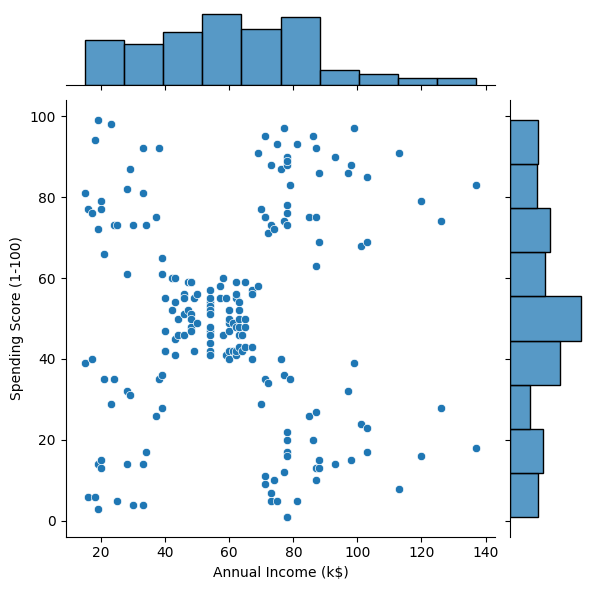

In [3]:
sns.jointplot(x = 'Annual Income (k$)',y='Spending Score (1-100)',data=df)
plt.show()

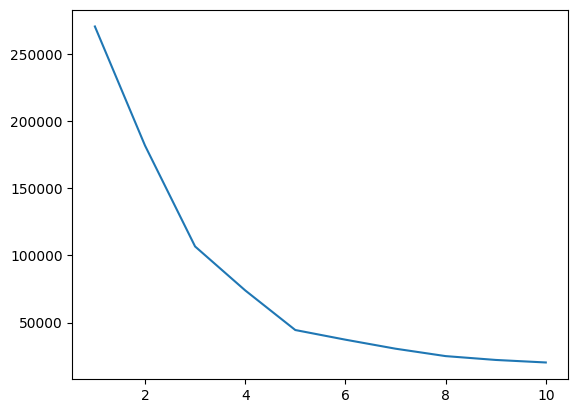

In [12]:
# Elbow Method Curve
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_init = 10, n_clusters = i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

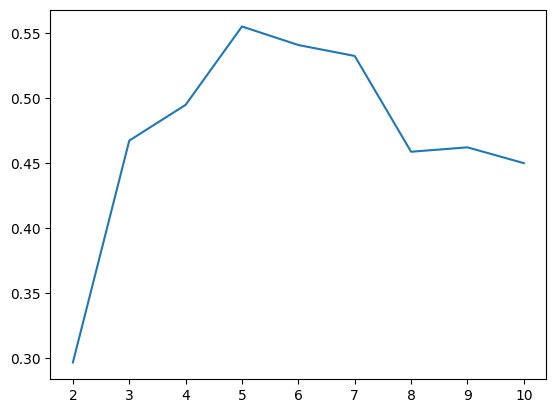

In [14]:
# Silhoutte Score
from sklearn.metrics import silhouette_score
sil = []
for i in range(2, 11):   # silhouette score require two clusters
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    sil.append(silhouette_avg)
plt.plot(range(2,11),sil)

In [6]:
kmean = KMeans(n_clusters=5)
kmean.fit(df)
y_predict = kmean.predict(df)
print(y_predict)


[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


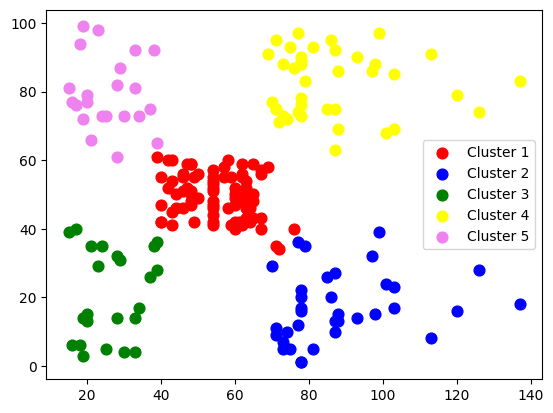

In [7]:
# Assuming your input data for clustering is in a variable named df and you've performed KMeans clustering resulting in y_predict

# Plotting the clusters and centroids
plt.scatter(df[y_predict == 0]['Annual Income (k$)'], df[y_predict == 0]['Spending Score (1-100)'], s=60, c='red', label='Cluster 1')
plt.scatter(df[y_predict == 1]['Annual Income (k$)'], df[y_predict == 1]['Spending Score (1-100)'], s=60, c='blue', label='Cluster 2')
plt.scatter(df[y_predict == 2]['Annual Income (k$)'], df[y_predict == 2]['Spending Score (1-100)'], s=60, c='green', label='Cluster 3')
plt.scatter(df[y_predict == 3]['Annual Income (k$)'], df[y_predict == 3]['Spending Score (1-100)'], s=60, c='yellow', label='Cluster 4')
plt.scatter(df[y_predict == 4]['Annual Income (k$)'], df[y_predict == 4]['Spending Score (1-100)'], s=60, c='violet', label='Cluster 5')
plt.legend()
plt.show()


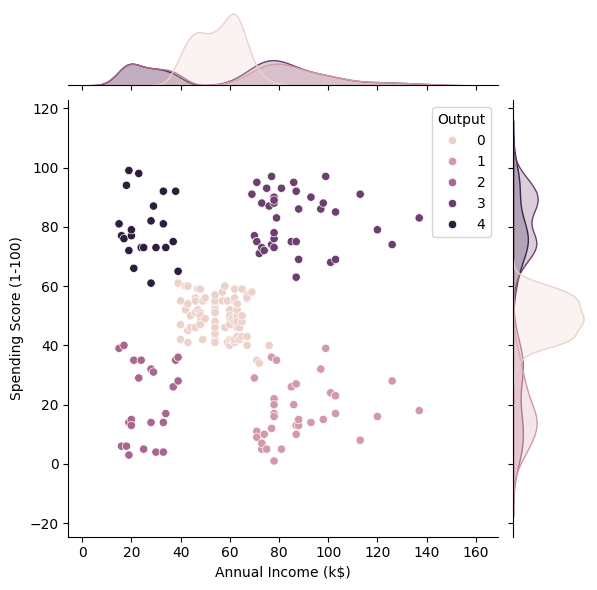

In [8]:
df['Output'] = y_predict
sns.jointplot(x = 'Annual Income (k$)',y='Spending Score (1-100)',data=df,hue='Output')
plt.show()